In [144]:
import numpy as np
import pandas as pd

In [145]:
df=pd.read_csv("ECommerce_consumer behaviour.csv")

##Data Understanding

In [146]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [147]:
df.shape

(2019501, 12)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


##Feature Engineering

####Fill in missing value

In [149]:
df['order_number'].value_counts()

1      124342
2      122397
3      120627
4      118573
5      105482
        ...  
97        834
91        826
95        741
99        716
100       493
Name: order_number, Length: 100, dtype: int64

In [150]:
df['order_number'] = df['order_number'].fillna(df['order_number'].mean())

In [151]:
df['order_number'].isnull().values.sum()

0

In [152]:
df['order_dow'] = df['order_dow'].fillna(df['order_dow'].mean())

In [153]:
df['order_dow'].isnull().values.sum()

0

In [154]:
df['order_hour_of_day'] = df['order_hour_of_day'].fillna(df['order_hour_of_day'].mean())

In [155]:
df['order_hour_of_day'].isnull().values.sum()

0

In [156]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(df['days_since_prior_order'].mean())

In [157]:
df['days_since_prior_order'].isnull().values.sum()

0

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [159]:
df['product_id'] = df['product_id'].fillna(df['product_id'].mean())

In [160]:
df['add_to_cart_order'] = df['add_to_cart_order'].fillna(df['add_to_cart_order'].mean())

In [161]:
df['reordered'] = df['reordered'].fillna(df['reordered'].mean())

In [162]:
df['department_id'] = df['department_id'].fillna(df['department_id'].mean())

In [163]:
df['department'].value_counts()

produce            588996
dairy eggs         336915
snacks             180692
beverages          168126
frozen             139536
pantry             116262
bakery              72983
canned goods        66053
deli                65176
dry goods pasta     54054
household           46446
breakfast           44605
meat seafood        44271
personal care       28134
babies              25940
international       16738
alcohol              9439
pets                 6013
missing              4749
other                2240
bulk                 2133
Name: department, dtype: int64

In [164]:
df['department'] = df['department'].fillna('produce')

In [165]:
df['product_name'].value_counts()

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

In [166]:
df['product_name'] = df['product_name'].fillna('fresh fruits')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [168]:
df = df.sample(n = 5000, random_state = 27)

In [169]:
df.shape

(5000, 12)

####Convert object to numeric with Label Encoding

In [170]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['department'] = label_encoder.fit_transform(df['department'])
df['product_name'] = label_encoder.fit_transform(df['product_name'])

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1985967 to 1032890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   user_id                 5000 non-null   int64  
 2   order_number            5000 non-null   int64  
 3   order_dow               5000 non-null   int64  
 4   order_hour_of_day       5000 non-null   int64  
 5   days_since_prior_order  5000 non-null   float64
 6   product_id              5000 non-null   int64  
 7   add_to_cart_order       5000 non-null   int64  
 8   reordered               5000 non-null   int64  
 9   department_id           5000 non-null   int64  
 10  department              5000 non-null   int64  
 11  product_name            5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 507.8 KB


####Convert all to int

In [172]:
df['order_number'] = df['order_number'].astype(int)

In [173]:
df['order_dow'] = df['order_dow'].astype(int)

In [174]:
df['order_hour_of_day'] = df['order_hour_of_day'].astype(int)

In [175]:
df['days_since_prior_order'] = df['days_since_prior_order'].astype(int)

In [176]:
df['product_id'] = df['product_id'].astype(int)

In [177]:
df['add_to_cart_order'] = df['add_to_cart_order'].astype(int)

In [178]:
df['reordered'] = df['reordered'].astype(int)

In [179]:
df['department_id'] = df['department_id'].astype(int)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1985967 to 1032890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   order_id                5000 non-null   int64
 1   user_id                 5000 non-null   int64
 2   order_number            5000 non-null   int64
 3   order_dow               5000 non-null   int64
 4   order_hour_of_day       5000 non-null   int64
 5   days_since_prior_order  5000 non-null   int64
 6   product_id              5000 non-null   int64
 7   add_to_cart_order       5000 non-null   int64
 8   reordered               5000 non-null   int64
 9   department_id           5000 non-null   int64
 10  department              5000 non-null   int64
 11  product_name            5000 non-null   int64
dtypes: int64(12)
memory usage: 507.8 KB


##Isolation Forest

In [181]:
numerical_features = df.select_dtypes(int).columns

X_numerical = df[numerical_features]

#### Splitting 70 30

In [182]:
from sklearn.model_selection import train_test_split

# Splitting the data into 70-30 training and testing sets
X_train, X_test = train_test_split(X_numerical, test_size=0.3, random_state=37)

In [183]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=float(0.2),
    random_state=np.random.RandomState(37)
)
model.fit(X_train)

# Printing the model parameters
print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7B1169AD0A40, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [184]:
df['anomaly_score'] = model.decision_function(X_numerical)  # Use X_numerical, not X_test

# Predicting anomalies on the entire dataset (not just the test set)
df['anomaly_label'] = model.predict(X_numerical)

# Displaying rows with anomaly labels equal to -1 (indicating anomalies)
anomalies = df[df['anomaly_label'] == -1].head()
print(anomalies)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
1153389   3229744   201268            95          3                 13   
1676566   3407841    56022            42          6                 19   
1268654   1951235   188407            59          1                 12   
1265203    165903   193105             4          0                 13   
203541    1859156     3845             2          2                 13   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
1153389                       1          18                 26          1   
1676566                       4         108                  3          0   
1268654                       3          92                  4          1   
1265203                      28          98                  8          1   
203541                       30           9                 14          0   

         department_id  department  product_name  anomaly_score  anomaly_label  
1153389    

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.metrics import accuracy_score

df['true_label'] = 1

# Function to train Isolation Forest model, calculate accuracy, and print results
def train_and_evaluate(X_train, X_numerical):
    model = IsolationForest(
        n_estimators=100,
        max_samples='auto',
        contamination=float(0.2),
        random_state=np.random.RandomState(37)
    )
    model.fit(X_train)

    # Predicting anomalies on the entire dataset
    df['anomaly_score'] = model.decision_function(X_numerical)
    df['anomaly_label'] = model.predict(X_numerical)

    # Calculate accuracy
    accuracy = accuracy_score(df['true_label'], df['anomaly_label'])

    # Print the results
    print(f"Accuracy: {accuracy:.2f}")

In [186]:
#Accuracy splitting with 70 30
train_and_evaluate(X_train, X_numerical)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.80


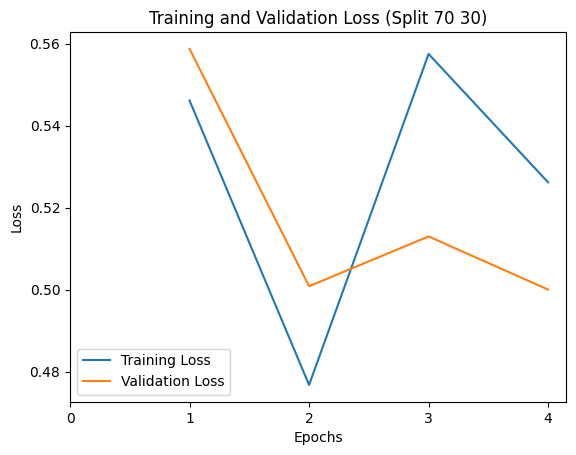

In [202]:
# Calculate loss on training and validation sets
train_loss = -model.score_samples(X_train)
val_loss = -model.score_samples(X_test)

# Plotting the loss curves
epochs = range(1, 5)

plt.plot(epochs, train_loss[:len(epochs)], label='Training Loss')
plt.plot(epochs, val_loss[:len(epochs)], label='Validation Loss')

plt.title('Training and Validation Loss (Split 70 30)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(arange(0, 5, 1))
plt.legend(loc='best')
plt.show()

Both training loss and validation loss are deacreasing and increasing at some point which indicates a good fit.

#### Splitting 60 40

In [188]:
# Splitting the data into 60-40 training and testing sets
X2_train, X2_test = train_test_split(X_numerical, test_size=0.4, random_state=37)

In [189]:
model2 = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=float(0.2),
    random_state=np.random.RandomState(37)
)
model2.fit(X2_train)

# Printing the model parameters
print(model2.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7B1169AD0640, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [190]:
df['anomaly_score'] = model2.decision_function(X_numerical)  # Use X_numerical, not X_test

# Predicting anomalies on the entire dataset (not just the test set)
df['anomaly_label'] = model2.predict(X_numerical)

# Displaying rows with anomaly labels equal to -1 (indicating anomalies)
anomalies2 = df[df['anomaly_label'] == -1].head()
print(anomalies2)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
1985967   2144320    32594            61          1                 11   
1153389   3229744   201268            95          3                 13   
1676566   3407841    56022            42          6                 19   
1268654   1951235   188407            59          1                 12   
203541    1859156     3845             2          2                 13   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
1985967                       5          61                  1          1   
1153389                       1          18                 26          1   
1676566                       4         108                  3          0   
1268654                       3          92                  4          1   
203541                       30           9                 14          0   

         department_id  department  product_name  anomaly_score  \
1985967             19   

In [191]:
#Accuracy splitting with 60 40
train_and_evaluate(X2_train, X_numerical)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.80


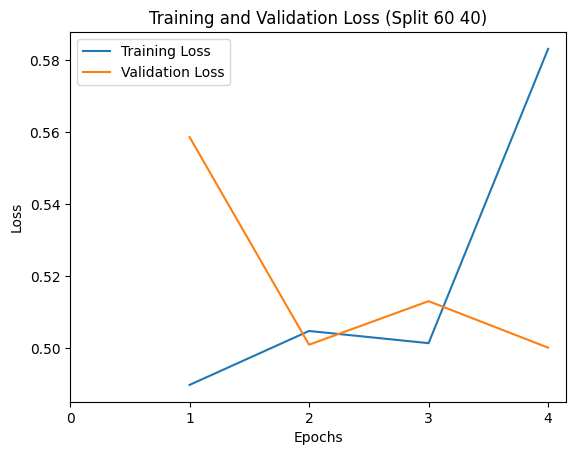

In [201]:
# Calculate loss on training and validation sets
train_loss = -model.score_samples(X2_train)
val_loss = -model.score_samples(X2_test)

# Plotting the loss curves
epochs = range(1, 5)

plt.plot(epochs, train_loss[:len(epochs)], label='Training Loss')
plt.plot(epochs, val_loss[:len(epochs)], label='Validation Loss')

plt.title('Training and Validation Loss (Split 60 40)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(arange(0, 5, 1))
plt.legend(loc='best')
plt.show()

Validation loss is greater than training loss which indicates the model is overfitting.

#### Splitting 80 20

In [193]:
# Splitting the data into 80-20 training and testing sets
X3_train, X3_test = train_test_split(X_numerical, test_size=0.2, random_state=37)

In [194]:
df['anomaly_score'] = model3.decision_function(X_numerical)  # Use X_numerical, not X_test

# Predicting anomalies on the entire dataset (not just the test set)
df['anomaly_label'] = model3.predict(X_numerical)

# Displaying rows with anomaly labels equal to -1 (indicating anomalies)
anomalies3 = df[df['anomaly_label'] == -1].head()
print(anomalies3)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
1985967   2144320    32594            61          1                 11   
1153389   3229744   201268            95          3                 13   
1268654   1951235   188407            59          1                 12   
1265203    165903   193105             4          0                 13   
203541    1859156     3845             2          2                 13   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
1985967                       5          61                  1          1   
1153389                       1          18                 26          1   
1268654                       3          92                  4          1   
1265203                      28          98                  8          1   
203541                       30           9                 14          0   

         department_id  department  product_name  anomaly_score  \
1985967             19   

In [195]:
#Accuracy splitting with 80 20
train_and_evaluate(X3_train, X_numerical)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.80


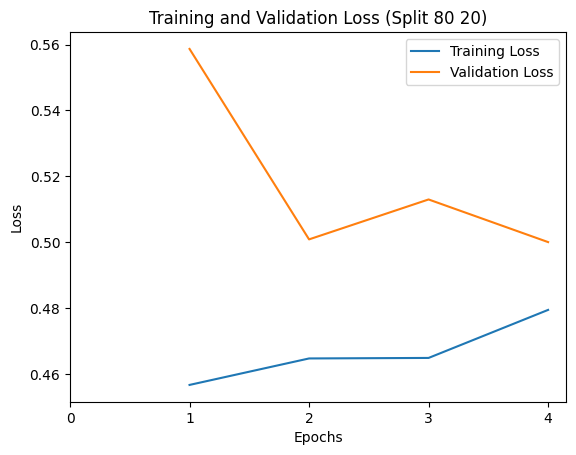

In [200]:
# Calculate loss on training and validation sets
train_loss = -model.score_samples(X3_train)
val_loss = -model.score_samples(X3_test)

# Plotting the loss curves
epochs = range(1, 5)

plt.plot(epochs, train_loss[:len(epochs)], label='Training Loss')
plt.plot(epochs, val_loss[:len(epochs)], label='Validation Loss')

plt.title('Training and Validation Loss (Split 80 20)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(arange(0, 5, 1))
plt.legend(loc='best')
plt.show()

Validation loss is greater than training loss which indicates the model is overfitting.

All of three spliting way have 80% accuracy.

Source:

https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2

https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

https://towardsdatascience.com/how-to-perform-anomaly-detection-with-the-isolation-forest-algorithm-e8c8372520bc